### Linearity vs Non-linearity
Tất cả các data đều không phải chỉ biểu thị xu hướng theo dạng linearity
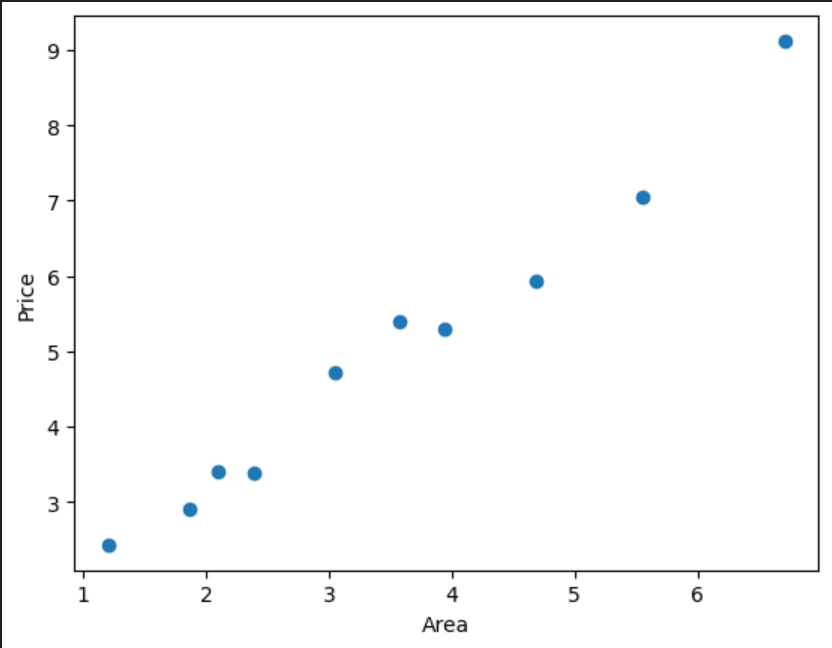

Mà có thể theo bất kỳ dạng đường cong nào khác
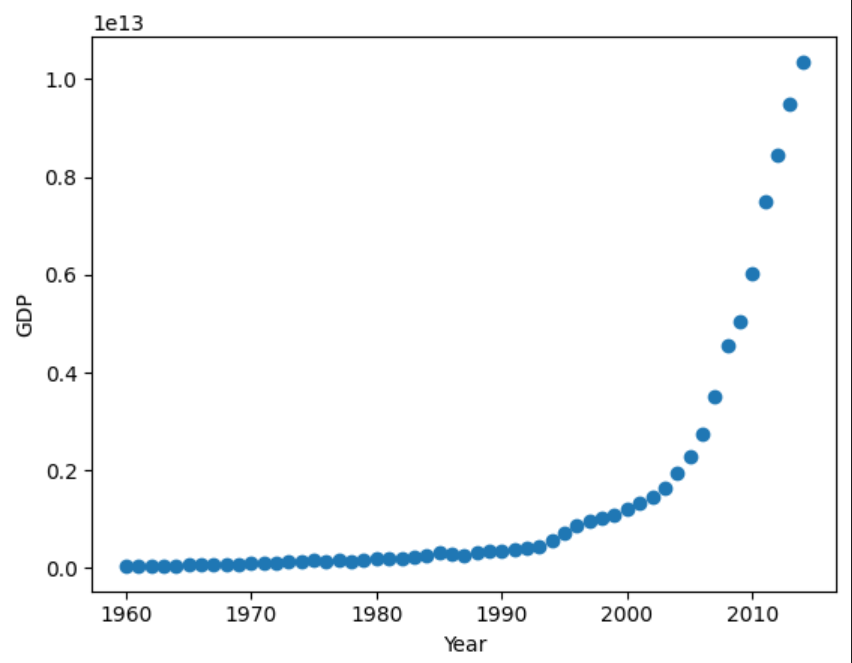

Nhiệm vụ phải xây dựng một thuật toán có thể biểu thị tất cả các phương trình nhất có thể để fit vào với xu hướng của tập dataset

### Một vài ký hiệu mới

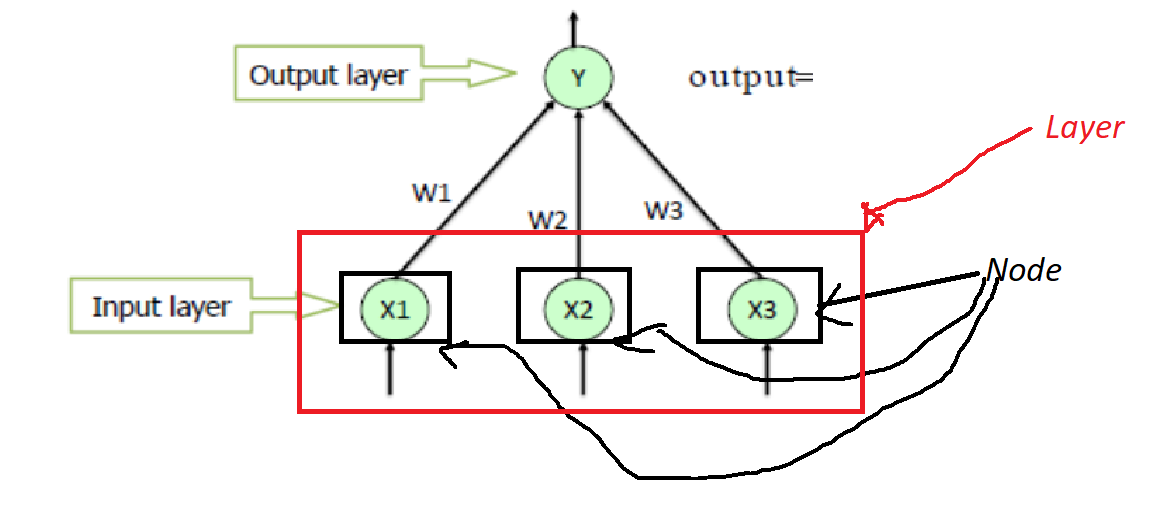

Đây là graph về linear regression mình đã học với X và W với phương trình là:
$ y = X_1.W_1 + X_2.W_2 + X_3.W_3 $ 

Tuy nhiên phương trình trên là phương trình đường thẳng, và mô hình cũng chỉ có thể giải những bài toán có data xu hướng đường thẳng


### Activation Function

Activation function là một hàm hàm số dùng trước khi đưa ra kết quả, ví dụ như phương trình trên
$$ y = X_1.W_1 + X_2.W_2 + X_3.W_3 $$
$$ y_1 = Activation(y)$$

#### **1. Sigmoid**
$$f(x) = \frac{1}{1+e^{-x}}$$

Đây là một hàm activation từng rất phổ biến, vì nó có 2 lợi ích: 
- Biến giá trị output của mình từ linear sang non-linear
- Giá trị của output nằm trong khoảng (0,1) giúp normalize output lại một khoảng nhất định

Giá trị đạo hàm của hàm này là: 
$$ f'(x) = \frac{e^{-x}}{(1+e^{-x})^2} $$
triển khai thành
$$ f'(x) = \frac{1}{1+e^{-x}}*(1-\frac{1}{1+e^{-x}})=  f(x)*(1-f(x)) $$ 
công thức được giải thích ở đây https://www.banhoituidap.com/p/33/giai-bai-toan-dao-ham-cua-ham-sigmoid-y-frac11-e-x/

Tuy nhiên giá trị đạo hàm này chỉ nằm trong khoảng [0,0.25] -> Làm cập nhật trọng số bị chậm và training lâu. Dựa vào đồ thị sau
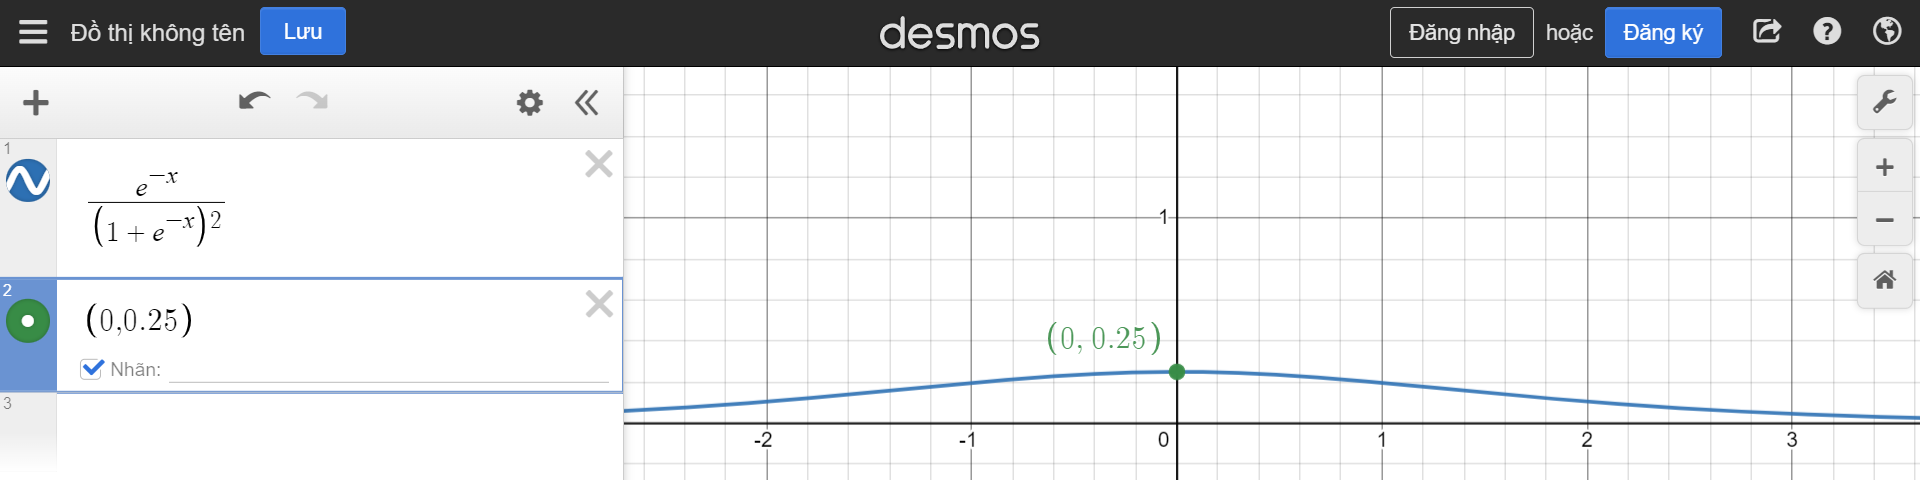

https://www.quora.com/Where-can-one-find-proof-that-the-derivative-of-a-sigmoid-function-ranges-between-0-and-0-25


#### **2. RELU**
Cần có một hàm activation mà khắc phục được lỗi giá trị đạo hàm nhỏ, và biến mô hình thành non-linearity

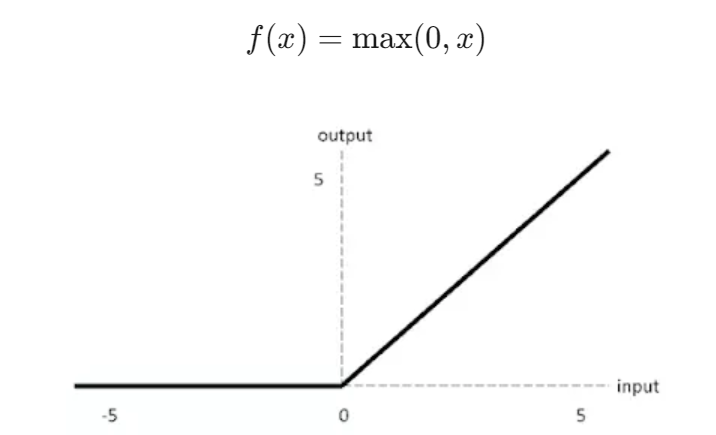

$ f'(x) = 1$  (if x>0) hoặc $ f'(x) = 0$ (if x<=0)

Điểm mạnh của RELU so với Sigmoid:
- Đơn giản hơn RELU, đạo hàm đơn giản hơn
- Vẫn giúp mô hình về hướng non-linearity
- Giá trị đạo hàm bằng 1 khi x > 0, cao hơn giá trị đạo hàm ở Sigmoid

### Các nhà khoa học đã nghĩ ra cách để giải quyết bài toán hơn bằng 2 bước:
1. Sử dụng những hàm kích hoạt toán học (activation function): sigmoid, RELU
2. Sử dụng thêm nhiều node và layer -> tăng trọng số và độ phức tạp

Theo ví dụ dưới đây:
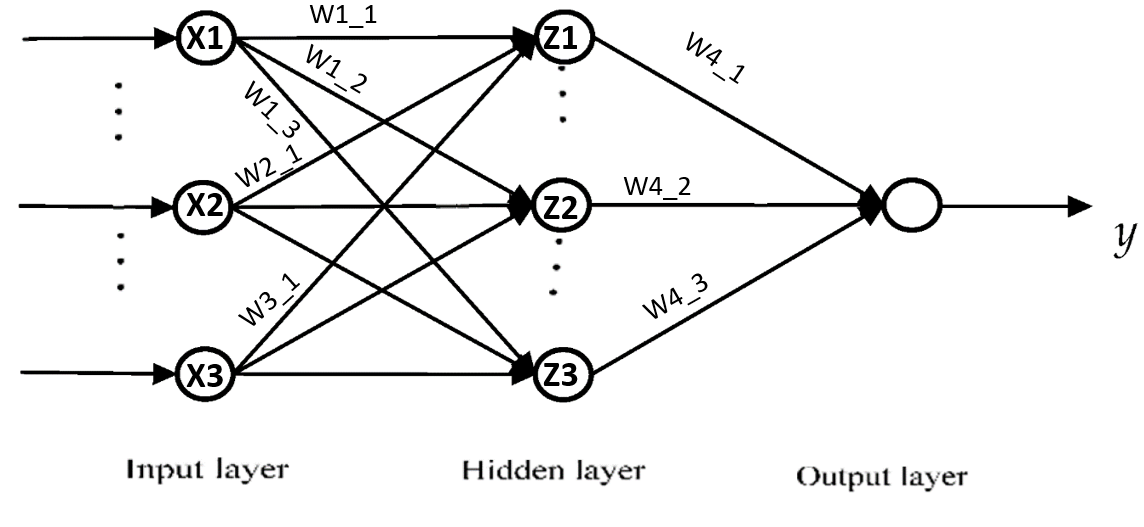

Ta có: 
- 9 trọng số ở input_layer -> hidden_layer
- 3 trọng số ở hidden_layer -> output_layer
- Hàm activation được dùng ở lớp hidden layer

=> 12 trọng số tất cả cho một bài toán gồm 3 feature và một output y

Phương trình là: 
$$ z_1 = Activation(X_1*W_{11} + X_2*W_{21} + X_3*W_{31})$$
$$ z_2 = Activation(X_1*W_{12} + X_2*W_{22} + X_3*W_{32})$$
$$ z_3 = Activation(X_1*W_{13} + X_2*W_{23} + X_3*W_{33})$$
$$ y= z_1 * W_{41} + z_2 * W_{42} + z_3 * W_{43}


#### **Quy định đặt tên biến**
Để quy chuẩn, ta sẽ tuân theo cách đặt tên biến theo kiểu này

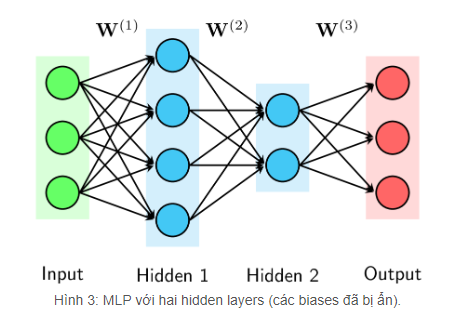

Trích từ: https://machinelearningcoban.com/2017/02/24/mlp/, chương 2.1 Layers

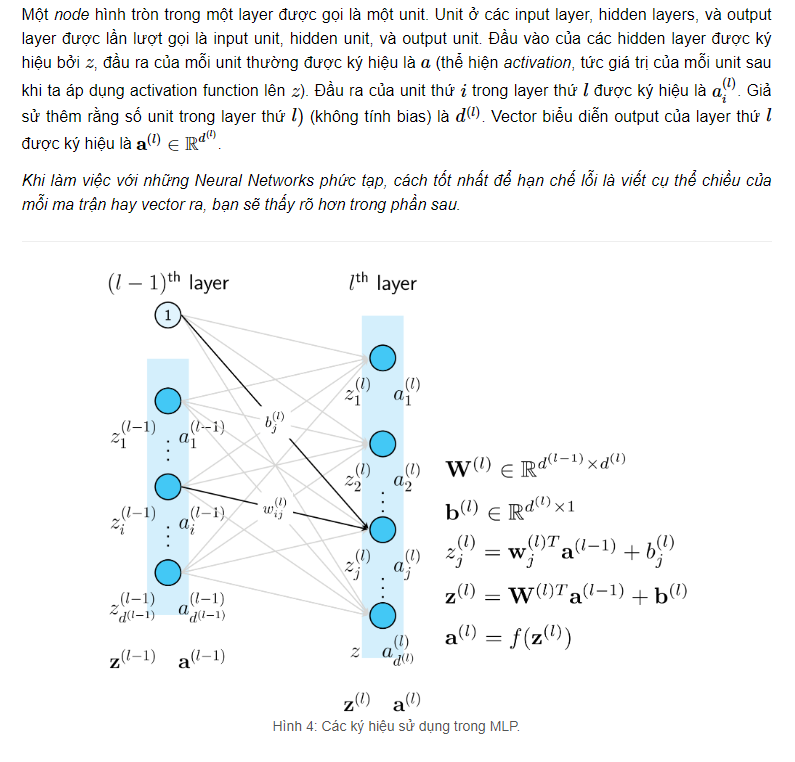

Trích từ: https://machinelearningcoban.com/2017/02/24/mlp/, chương 2.2 Units

### Vectorizing với nhiều node trong hidden layer

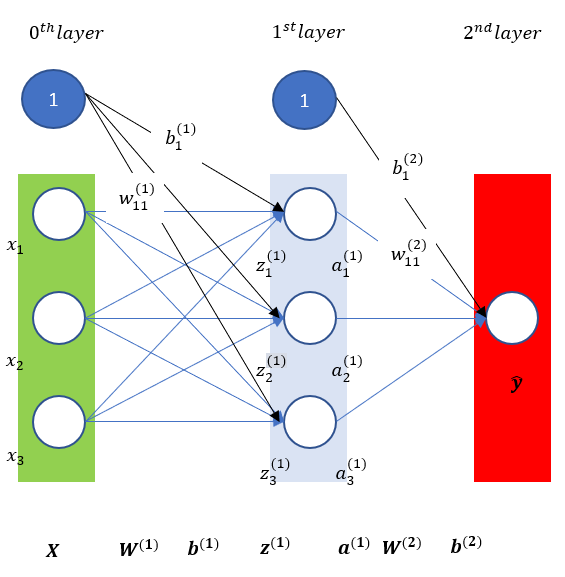

$$z_{1}^{(1)} = x_1* w_{11}^{(1)} + x_2* w_{21}^{(1)} + x_3* w_{31}^{(1)} + b_{1}^{(1)}$$
$$z_{2}^{(1)} = x_1* w_{12}^{(1)} + x_2* w_{22}^{(1)} + x_3* w_{32}^{(1)} + b_{2}^{(1)}$$

Ví dụ về tổng số trọng số khi cho input layer -> output layer

### Giải bài toán dự đoán sales advertising

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

data = np.genfromtxt('../advertising/advertising.csv',dtype="float64",delimiter=',')
X_train, X_test, y_train, y_test = train_test_split(data[:,:3], data[:,3], test_size=0.33, random_state=42)
X_train.shape

(12, 3)

Theo bài Advertising, ta có: 
$$X=(12,3), y=(12,1)$$
$$W^{(1)} = (3,3),W^{(2)} = (3,1),b^{(1)}=(1,3),b^{(2)}=(1,1)$$
$$f \text{ là hàm ReLU}$$
------
Flow dự đoán:
$$z^{(1)} = X*W^{(1)} + b^{(1)}$$
$$a^{(1)} = f(z^{(1)})$$
$$\hat{y}=a^{(1)}*W^{(2)} + b^{(2)}$$
$$Loss = (\hat{y}-y)^2$$
-----
Flow cập nhật tham số ở $l^{(1)}$: 

$$\frac{dW^{(1)}}{dLoss} =\frac{dW^{(1)}}{dz^{(1)}}*\frac{dz^{(1)}}{da^{(1)}}*\frac{da^{(1)}}{d\hat{y}}*\frac{d\hat{y}}{dLoss}
=X * 
\begin{cases}
0 \text{ if } z^{(1)} <= 0\\
1 \text{ if } z^{(1)} > 0
\end{cases}
* W^{(2)}*2(\hat{y}-y)
$$

$$\frac{db^{(1)}}{dLoss} =\frac{db^{(1)}}{dz^{(1)}}*\frac{dz^{(1)}}{da^{(1)}}*\frac{da^{(1)}}{d\hat{y}}*\frac{d\hat{y}}{dLoss}
=1 * 
\begin{cases}
0 \text{ if } z^{(1)} <= 0\\
1 \text{ if } z^{(1)} > 0
\end{cases}
* W^{(2)}*2(\hat{y}-y)$$
--------
Flow cập nhật tham số ở $l^{(2)}$: 


$$\frac{dW^{(2)}}{dLoss} =\frac{dW^{(2)}}{d\hat{y}}*\frac{d\hat{y}}{dLoss}
=a^{(1)}*2(\hat{y}-y)$$


$$\frac{db^{(2)}}{dLoss} =\frac{db^{(2)}}{d\hat{y}}*\frac{d\hat{y}}{dLoss}
= 1*2(\hat{y}-y)$$



In [2]:
import numpy as np
import random

class MLPWith1HiddenLayer:
    def __init__(self, lr=0.0001, n_epoch=1000, n_node_hidden_layer=3):
        self.lr = lr
        self.n_epoch = n_epoch
        self.n_node_hidden_layer = n_node_hidden_layer
        self.W1 = np.random.rand(3, n_node_hidden_layer) - 0.5
        self.b1 = np.zeros((1, n_node_hidden_layer))
        self.W2 = np.random.rand(n_node_hidden_layer, 1) - 0.5
        self.b2 = np.zeros((1, 1))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        x[x <= 0] = 0
        x[x > 0] = 1
        return x

    def forward(self, X):
        # Input layer to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Hidden layer to output layer
        self.y_hat = np.dot(self.a1, self.W2) + self.b2

        return self.y_hat

    def fit(self, X, Y):
        N = len(X)  # number of samples
        for i in range(self.n_epoch):
            # Forward pass
            y_hat = self.forward(X)
            # Calculate loss
            f = y_hat - Y
            loss = np.sum(f**2) / N
            print("Epoch", i+1, ", Loss", loss)

            # Backpropagation
            # Calculate gradients
            dW2 = np.dot(self.a1.T, 2*f) / N
            db2 = np.sum(2*f) / N
            df1 = np.dot(2*f, self.W2.T)
            dz1 = df1 * self.relu_derivative(self.z1)
            dW1 = np.dot(X.T, dz1) / N
            db1 = np.sum(dz1) / N

            # Update weights and biases
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1



In [3]:
model = MLPWith1HiddenLayer(lr=0.0001,n_node_hidden_layer=3,n_epoch=100000)
model.fit(X_train,y_train.reshape(-1, 1))


Epoch 1 , Loss 245.46265927585637
Epoch 2 , Loss 132.36285259368
Epoch 3 , Loss 73.05424756956626
Epoch 4 , Loss 41.28836709547
Epoch 5 , Loss 26.792773632114073
Epoch 6 , Loss 21.045496694789193
Epoch 7 , Loss 18.627387100021398
Epoch 8 , Loss 17.25264845184226
Epoch 9 , Loss 16.21456911049499
Epoch 10 , Loss 15.32787310874535
Epoch 11 , Loss 14.542111825529732
Epoch 12 , Loss 13.838190369093182
Epoch 13 , Loss 13.2047422356379
Epoch 14 , Loss 12.63302495222319
Epoch 15 , Loss 12.115728627099875
Epoch 16 , Loss 11.646594620199698
Epoch 17 , Loss 11.220218611628859
Epoch 18 , Loss 10.831911388197668
Epoch 19 , Loss 10.4775886166808
Epoch 20 , Loss 10.153680556110176
Epoch 21 , Loss 9.857057194035688
Epoch 22 , Loss 9.58496576035357
Epoch 23 , Loss 9.334978311255162
Epoch 24 , Loss 9.104947567320083
Epoch 25 , Loss 8.89296955475877
Epoch 26 , Loss 8.697351880712688
Epoch 27 , Loss 8.516586694907247
Epoch 28 , Loss 8.349327565447798
Epoch 29 , Loss 8.194369636599484
Epoch 30 , Loss 8.050

In [4]:
## Recheck result :)

y_hat = model.forward(X_test)
print("Loss of testing data:",np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test))
print("X is: ",X_test)
print("Predicted: ",y_hat)
print("Truth: ",y_test)

Loss of testing data: 9.942270023992378
X is:  [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [  8.6   2.1   1. ]
 [  8.7  48.9  75. ]
 [151.5  41.3  58.5]
 [ 97.5   7.6   7.2]]
Predicted:  [[23.44215448]
 [10.57530072]
 [ 5.65620867]
 [13.37638206]
 [19.48411855]
 [10.53207338]]
Truth:  [22.1 10.4  4.8  7.2 16.5 13.7]


### **Let's try to visualize the dataset with multiple variables**
1. Visualize each variable


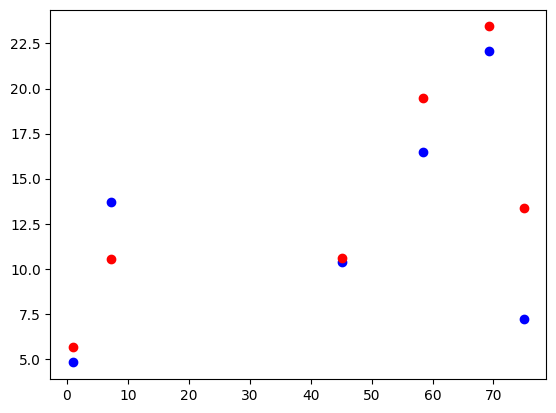

In [10]:
#TV
import numpy as np
import matplotlib.pyplot as plt

X = X_test[:,2]
plt.scatter(X, y_test, label='Observed Data', color='blue')
plt.scatter(X, y_hat, label='Predicted Data', color='red')


### Bài tập về MLP 1 hidden layer:
- Chạy code model trên với tập dataset Housing.csv (advertising/Housing.csv). 
- Sau đó so sánh kết quả dự đoán của 2

Ngoại lệ: 
- Nếu loss ra Nan -> Tạm thời thử chạy lại (hoặc giảm lr xuống). 

-----------------------

 ### Vectorizing với nhiều node trong hidden layer và với nhiều hidden layer

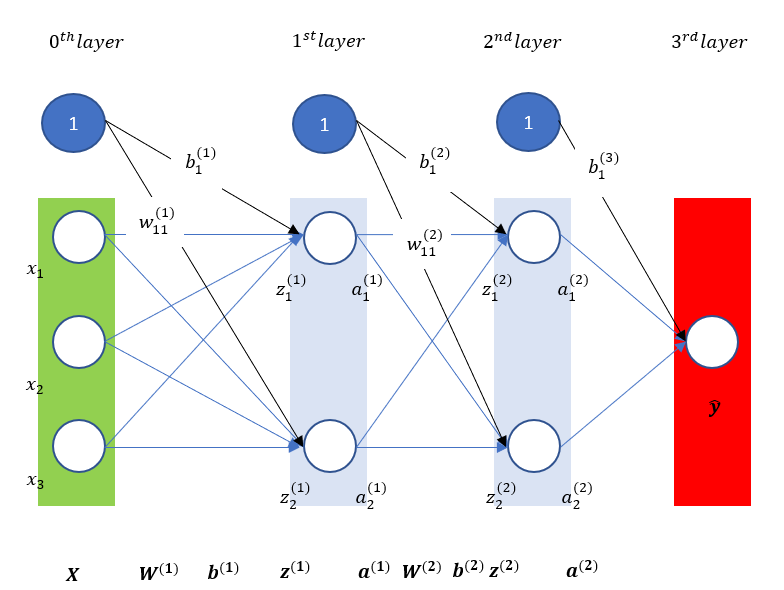

**Forward** Kết quả của layer trước sẽ được dùng ở layer tiếp theo, nên ta sẽ tính theo flow 1-2-3
- Layer thứ 1
$$z^{(1)} = XW^{(1)} + b^{(1)}$$
$$a^{(1)} = f(z^{(1)})$$ 

- Layer thứ 2
$$z^{(2)} = a^{(1)}W^{(2)} + b^{(2)}$$
$$a^{(2)} = f(z^{(2)})$$ 

- Layer thứ 3
$$\hat{y} = a^{(2)}W^{(3)} + b^{(3)}$$

---------

**Loss**
$$loss = (\hat{y}-y)^2$$

--------
**Update weight** Kết quả của layer sau sẽ được dùng ở layer trước, nên ta sẽ tính theo flow 3-2-1
- Layer thứ 3 

$$\frac{dLoss}{dW^{(3)}} = \frac{dLoss}{d\hat{y}}.\frac{d\hat{y}}{dW^{(3)}}$$

$$\frac{dLoss}{db^{(3)}} = \frac{dLoss}{d\hat{y}}.\frac{d\hat{y}}{db^{(3)}}$$

- Layer thứ 2


$$\frac{dLoss}{dW^{(2)}} = \frac{dLoss}{d\hat{y}}.\frac{d\hat{y}}{da^{(2)}}.\frac{da^{(2)}}{dz^{(2)}}.\frac{dz^{(2)}}{dW^{(2)}}$$

$$\frac{dLoss}{db^{(2)}} = \frac{dLoss}{d\hat{y}}.\frac{d\hat{y}}{da^{(2)}}.\frac{da^{(2)}}{dz^{(2)}}.\frac{dz^{(2)}}{db^{(2)}}$$

- Layer thứ 1

$$\frac{dLoss}{dW^{(1)}} = \frac{dLoss}{d\hat{y}}.\frac{d\hat{y}}{da^{(2)}}.\frac{da^{(2)}}{dz^{(2)}}.\frac{dz^{(2)}}{da^{(1)}}.\frac{da^{(1)}}{dz^{(1)}}.\frac{dz^{(1)}}{dW^{(1)}}$$

$$\frac{dLoss}{db^{(1)}} = \frac{dLoss}{d\hat{y}}.\frac{d\hat{y}}{da^{(2)}}.\frac{da^{(2)}}{dz^{(2)}}.\frac{dz^{(2)}}{da^{(1)}}.\frac{da^{(1)}}{dz^{(1)}}.\frac{dz^{(1)}}{db^{(1)}}$$





In [ ]:
# hard code: 
z1 = X*W1 + b1
a1 = relu(z1)

z2 = X*W2 + b2
... 

class Layer:
    def __init__(self) -> None:
        self.W = ...
        self.b = ....
    def forward(self,input):
        
        return input*self.W + self.b




### **Ý tưởng để code**
Ta sẽ có các đối tượng NetworkLayer: 

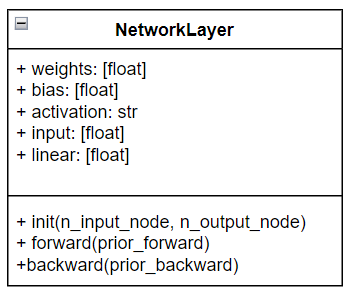

Do các object không thể lấy thuộc tính của nhau nên ta cần phải có tham số truyền vào hai hàm forward và backward

**Forward**

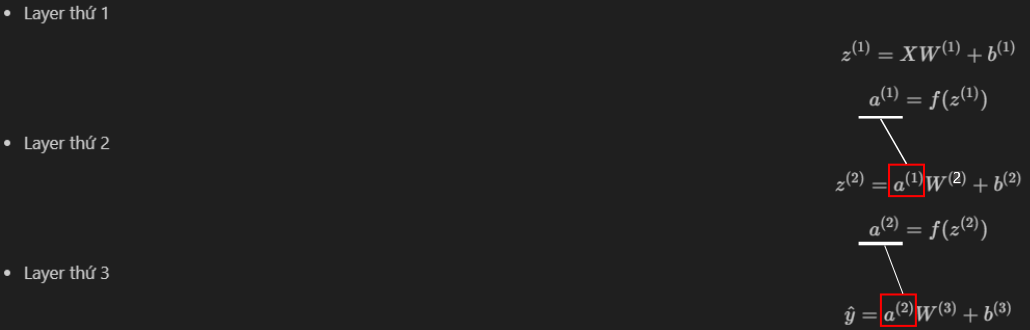

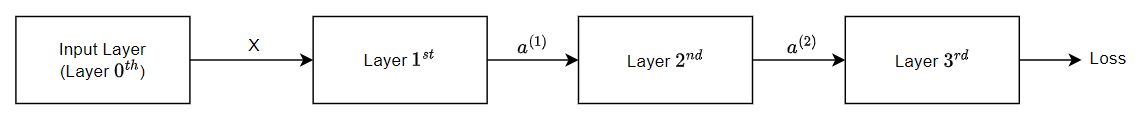

**Update Weight**

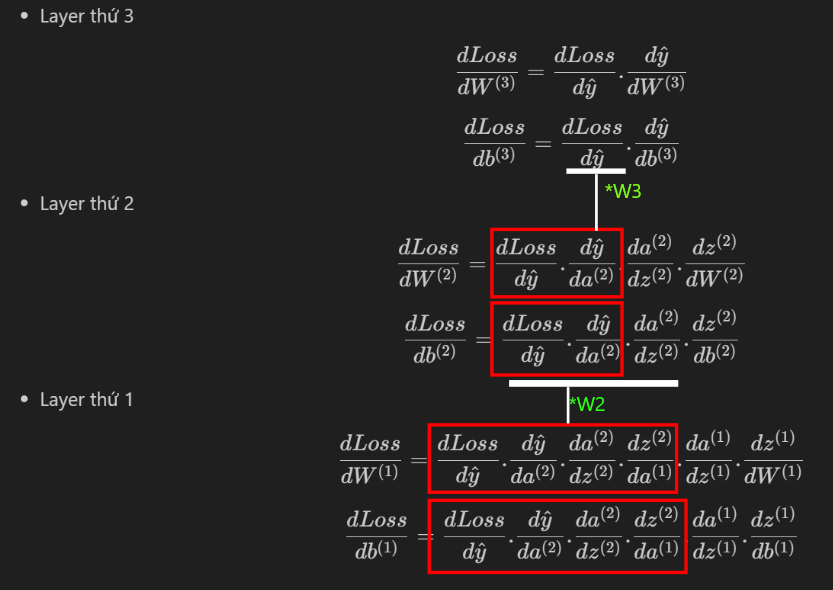
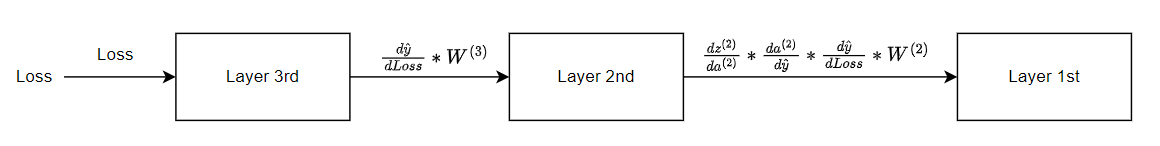

**Liên kết**

Tới đây ta có: 

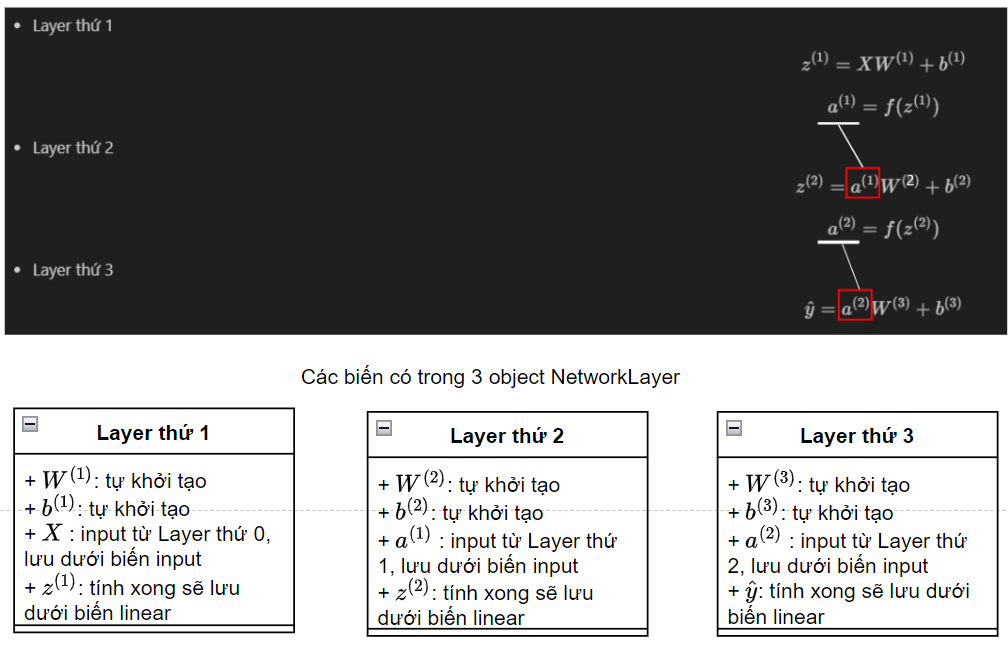

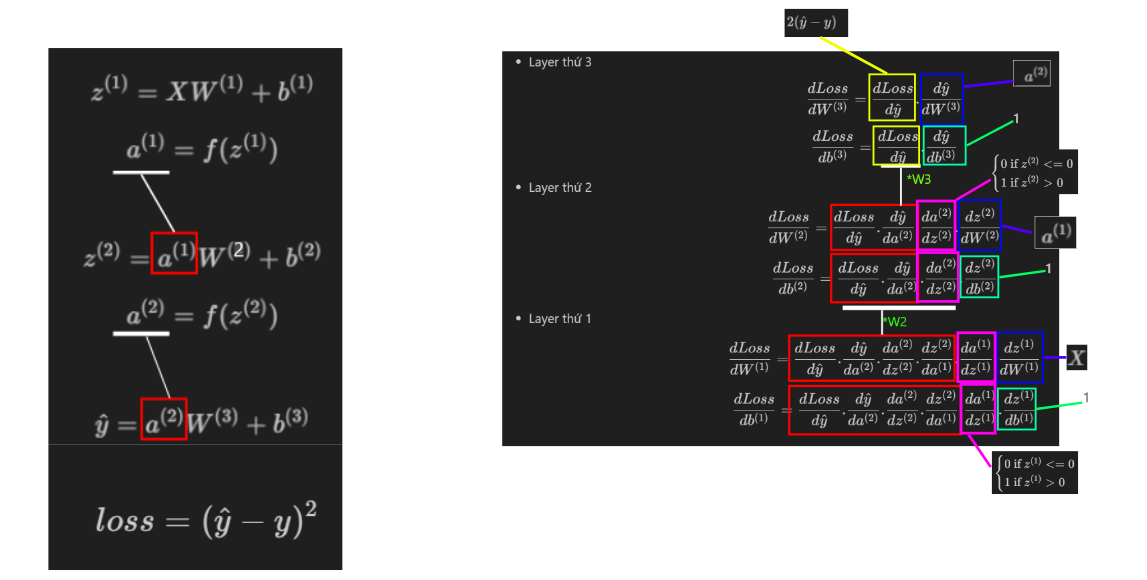

In [19]:
import numpy as np

class NetworkLayer:
    def __init__(self, numberOfInput, numberOfOutput, activation = None):
        """
        Initialize a network layer with random weights and bias.

        Parameters:
        numberOfInput (int): Number of input neurons of the layer.
        numberOfOutput (int): Number of output neurons of the layer.
        activation (str): Activation function of the layer (e.g., "RELU" for Rectified Linear Unit). Default is None.

        """
        self.weights = np.random.rand(numberOfInput,numberOfOutput) - 0.5
        self.bias = np.random.rand(1,numberOfOutput) - 0.5
        self.activation = activation

    def forward(self,priorForward):
        """
        Perform a forward pass through the network layer.

        Parameters:
        priorForward (numpy.ndarray): Input data for the layer.

        Returns:
        numpy.ndarray: Output result to be passed to the next layer.

        """
        self.input = priorForward
        self.linear = np.dot(priorForward,self.weights) + self.bias

        if self.activation == "RELU":
            output = np.maximum(0,self.linear)
        else:
            output = self.linear
        return output


    def backward(self, prior_d_loss,learningRate):
        """
        Perform a backward pass to update weights and bias and compute the loss output to pass to the previous layer.

        Parameters:
        priorLoss (numpy.ndarray): Input data for the layer.
        learningRate (float): Learning rate for weight and bias updates.

        Returns:
        numpy.ndarray: Loss gradient to be passed to the previous layer.

        """
        if self.activation == "RELU":
            prior_d_loss = prior_d_loss * ((self.linear > 0).astype(float))
        self.weights -= (np.dot(self.input.T ,prior_d_loss) * learningRate)
        self.bias -= (np.sum(prior_d_loss)* learningRate)

        return np.dot(prior_d_loss,self.weights.T)
    

class Model:
    def __init__(self):
        """
        Initialize a neural network model.

        """
        self.layers = []
    def add(self, layer):
        """
        Add a network layer to the model.

        Parameters:
        layer (NetworkLayer): The layer to be added to the model.

        """
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        """
        Set the training data and expected results for the model.

        Parameters:
        data (numpy.ndarray): Input training data.
        expectedResults (numpy.ndarray): Expected results for the training data.

        """
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def train(self, epoch, learningRate):
        """
        Train the model using the specified number of epochs and learning rate.

        Parameters:
        epoch (int): Number of training epochs.
        learningRate (float): Learning rate for weight and bias updates.

        """
        for j in range(epoch):
            d_loss = 0
            output = self.data
            for i in range(len(self.layers)):
                output = self.layers[i].forward(output)
            loss = np.sum(np.square(output - self.expectedResults))

            d_loss = (output - self.expectedResults) * 2 * (1 / len(self.data))
            for i in reversed(range(len(self.layers))):
                d_loss = self.layers[i].backward(d_loss, learningRate)

            print("Epoch",j+1,"Loss: ",loss/len(self.data))
            print("--------")


In [17]:
model = Model()
model.add(NetworkLayer(3,2, activation="RELU"))
model.add(NetworkLayer(2,2, activation="RELU"))
model.add(NetworkLayer(2,1))

model.fit(X_train,y_train.reshape(-1,1))
model.train(20000,0.0002)

y_hat = model.predict(X_test)
print("Loss of testing data:",np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test))
print("X is: ",X_test)
print("Predicted: ",y_hat)
print("Truth: ",y_test)

Epoch 1 Loss:  276.250643544097
--------
Epoch 2 Loss:  265.08732244860545
--------
Epoch 3 Loss:  262.6014697670218
--------
Epoch 4 Loss:  261.0076521747338
--------
Epoch 5 Loss:  259.8826820246575
--------
Epoch 6 Loss:  258.9536335715357
--------
Epoch 7 Loss:  258.14411681281325
--------
Epoch 8 Loss:  257.43050461552383
--------
Epoch 9 Loss:  256.7947151230442
--------
Epoch 10 Loss:  256.24726663522773
--------
Epoch 11 Loss:  255.8488651465708
--------
Epoch 12 Loss:  255.46902075017294
--------
Epoch 13 Loss:  255.10569630982081
--------
Epoch 14 Loss:  254.75712559014525
--------
Epoch 15 Loss:  254.42177006761312
--------
Epoch 16 Loss:  254.0982836603764
--------
Epoch 17 Loss:  253.78548373754393
--------
Epoch 18 Loss:  253.48232714438998
--------
Epoch 19 Loss:  253.18789026172166
--------
Epoch 20 Loss:  252.9013523306294
--------
Epoch 21 Loss:  252.6219814362677
--------
Epoch 22 Loss:  252.34912266914054
--------
Epoch 23 Loss:  252.08218807903071
--------
Epoch 24

Epoch 355 Loss:  6.147795533389542
--------
Epoch 356 Loss:  6.141895723770673
--------
Epoch 357 Loss:  6.136016025368828
--------
Epoch 358 Loss:  6.130156323417704
--------
Epoch 359 Loss:  6.124316504249848
--------
Epoch 360 Loss:  6.118496455283622
--------
Epoch 361 Loss:  6.112696065010286
--------
Epoch 362 Loss:  6.106915222981331
--------
Epoch 363 Loss:  6.101153819795958
--------
Epoch 364 Loss:  6.095411747088737
--------
Epoch 365 Loss:  6.089688897517459
--------
Epoch 366 Loss:  6.083985164751142
--------
Epoch 367 Loss:  6.078300443458226
--------
Epoch 368 Loss:  6.072634629294903
--------
Epoch 369 Loss:  6.0669876188936875
--------
Epoch 370 Loss:  6.06135930985202
--------
Epoch 371 Loss:  6.055749600721151
--------
Epoch 372 Loss:  6.050158390995151
--------
Epoch 373 Loss:  6.04458558109999
--------
Epoch 374 Loss:  6.039031072382909
--------
Epoch 375 Loss:  6.033494767101817
--------
Epoch 376 Loss:  6.027976568414903
--------
Epoch 377 Loss:  6.02247638037037

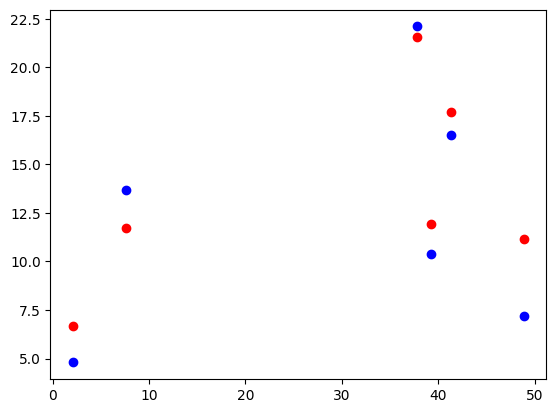

In [18]:
#TV
import numpy as np
import matplotlib.pyplot as plt

X = X_test[:,1]
plt.scatter(X, y_test, label='Observed Data', color='blue')
plt.scatter(X, y_hat, label='Predicted Data', color='red')


### **Optimizing Training** (optional)
https://datascience.stackexchange.com/questions/72351/how-to-prevent-vanishing-gradient-or-exploding-gradient

1. Weight Initialization (Xavier Initialization)
Link youtube: Xem phần cuối (Weight Initialization) và xem tiếp phần đầu của video tiếp theo trong playlist của ông này
https://www.youtube.com/watch?v=JNbkDSxusY8&list=PLdxQ7SoCLQANXLoQT4TyAgLlqOVWQc1Gy&index=11

Thay vì gán giá trị ngẫu nhiên cho Weight và Bias, ta sẽ gán biến dựa trên số lượng node input đầu vào. Cụ thể công thức là:

$W^{l}=N(0,1) * \frac{1}{\sqrt{n^{l-1}}}$ với n là số node ở layer trước ( hoặc gọi là số node input)

In [20]:
import numpy as np

class NetworkLayer_XavierInit:
    def __init__(self, numberOfInput, numberOfOutput, activation = None):
        self.weights = np.random.rand(numberOfInput,numberOfOutput) * 1/np.sqrt(numberOfInput)
        self.bias = np.random.rand(1,numberOfOutput) * 1/np.sqrt(numberOfInput)
        self.activation = activation

    def forward(self,priorForward):
        self.input = priorForward
        self.linear = np.dot(priorForward,self.weights) + self.bias

        if self.activation == "RELU":
            output = np.maximum(0,self.linear)
        else:
            output = self.linear
        return output


    def backward(self, priorBackward,learningRate):
        if self.activation == "RELU":
            priorBackward = priorBackward*(self.linear > 0).astype(float)
        self.weights -= (np.dot(self.input.T ,priorBackward) * learningRate)
        self.bias -= (np.sum(priorBackward)* learningRate)

        return np.dot(priorBackward,self.weights.T)
    

class Model:
    def __init__(self):
        self.layers = []
    def add(self, layer):
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def train(self, epoch, learningRate):
        for j in range(epoch):
            output = self.data
            for i in range(len(self.layers)):
                output = self.layers[i].forward(output)
            loss = np.sum(np.square(output - self.expectedResults))
            print("Loss ",j," is: ",loss)
            priorBackward =  (output - self.expectedResults) * 2 * (1 / len(self.data))
            for i in reversed(range(len(self.layers))):
                priorBackward = self.layers[i].backward(priorBackward, learningRate)


In [23]:
n_times_test = 10
result = []
for n in range(n_times_test):
    model = Model()
    model.add(NetworkLayer_XavierInit(3,2, activation="RELU"))
    model.add(NetworkLayer_XavierInit(2,2, activation="RELU"))
    model.add(NetworkLayer_XavierInit(2,1))

    model.fit(X_train,y_train.reshape(-1,1))
    model.train(10000,0.0001)

    y_hat = model.predict(X_test)

    test_loss = np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test)
    result.append(test_loss)
    print(f"Loss of testing data {str(n)} time:",test_loss)
result

Loss of testing data 0 time: 4.605991024707568
Loss of testing data 1 time: 6.40506537424487
Loss of testing data 2 time: 8.983552567700116


C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_16972\714008374.py:49: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(output - self.expectedResults))
C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_16972\714008374.py:23: RuntimeWarning: invalid value encountered in subtract
  self.weights -= (np.dot(self.input.T ,priorLoss) * learningRate)


Loss of testing data 3 time: nan
Loss of testing data 4 time: 5.496790162240863
Loss of testing data 5 time: nan
Loss of testing data 6 time: 5.7743297059056475
Loss of testing data 7 time: 6.221821849164901
Loss of testing data 8 time: 7.193535089114004
Loss of testing data 9 time: 7.7914783360843884


[4.605991024707568,
 6.40506537424487,
 8.983552567700116,
 nan,
 5.496790162240863,
 nan,
 5.7743297059056475,
 6.221821849164901,
 7.193535089114004,
 7.7914783360843884]

In [24]:
n_times_test = 10
result = []
for n in range(n_times_test):
    model = Model()
    model.add(NetworkLayer(3,2, activation="RELU"))
    model.add(NetworkLayer(2,2, activation="RELU"))
    model.add(NetworkLayer(2,1))

    model.fit(X_train,y_train.reshape(-1,1))
    model.train(10000,0.0001)

    y_hat = model.predict(X_test)

    test_loss = np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test)
    result.append(test_loss)
    print(f"Loss of testing data {str(n)} time:",test_loss)
result

Loss of testing data 0 time: 7.029365648290032
Loss of testing data 1 time: 9.089080630716529
Loss of testing data 2 time: 34.71257416952318
Loss of testing data 3 time: 10.36855914474687
Loss of testing data 4 time: 11.857742120611954
Loss of testing data 5 time: 6.68360034596557
Loss of testing data 6 time: 11.140484044149021
Loss of testing data 7 time: 34.807453151384614
Loss of testing data 8 time: 67.44976685785996
Loss of testing data 9 time: 8.115708425912011


[7.029365648290032,
 9.089080630716529,
 34.71257416952318,
 10.36855914474687,
 11.857742120611954,
 6.68360034596557,
 11.140484044149021,
 34.807453151384614,
 67.44976685785996,
 8.115708425912011]

2. Learning rate decay: Giảm dần learning rate theo thời gian

Link youtube: giới thiệu vài công thức để decay learning rate theo epoch 

https://www.youtube.com/watch?v=QzulmoOg2JE

Ở đây, mình dùng method phổ biến này: 

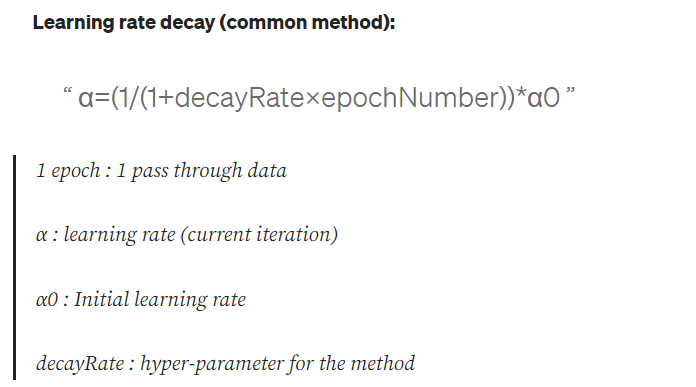


In [70]:
decay_rate = 1
class Model_learningdecay:
    def __init__(self):
        self.layers = []
    def add(self, layer):
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def train(self, epoch, learningRate):
        initial_learning_rate = learningRate
        for j in range(epoch):
            d_loss = 0
            output = self.data
            for i in range(len(self.layers)):
                output = self.layers[i].forward(output)
            d_loss = (output - self.expectedResults)
            loss = np.sum(np.square(output - self.expectedResults))

            d_loss = d_loss * 2 * (1 / len(self.data))
            learningRate = (1/(1+decay_rate*(j+1))) * initial_learning_rate
            
            for i in reversed(range(len(self.layers))):
                d_loss = self.layers[i].backward(d_loss, learningRate)
            print(f"epoch {j+1} loss: ",loss)
            print("-------------------")

In [63]:
n_times_test = 10
result = []
for n in range(n_times_test):
    model = Model_learningdecay()
    model.add(NetworkLayer_XavierInit(3,2, activation="RELU"))
    model.add(NetworkLayer_XavierInit(2,2, activation="RELU"))
    model.add(NetworkLayer_XavierInit(2,1))

    model.fit(X_train,y_train.reshape(-1,1))
    model.train(10000,0.0001)

    y_hat = model.predict(X_test)

    test_loss = np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test)
    result.append(test_loss)
    print(f"Loss of testing data {str(n)} time:",test_loss)
result

Loss of testing data 0 time: 8.759477707342645
Loss of testing data 1 time: 10.306979295752917
Loss of testing data 2 time: 15.05764714987633
Loss of testing data 3 time: 7.709691007178656


C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_16972\714008374.py:23: RuntimeWarning: invalid value encountered in subtract
  self.weights -= (np.dot(self.input.T ,priorLoss) * learningRate)
C:\Users\Latiude 7480\AppData\Local\Temp\ipykernel_16972\714008374.py:24: RuntimeWarning: invalid value encountered in subtract
  self.bias -= (np.sum(priorLoss)* learningRate)


Loss of testing data 4 time: nan
Loss of testing data 5 time: nan
Loss of testing data 6 time: 10.104056812486476
Loss of testing data 7 time: 9.556171539014509
Loss of testing data 8 time: 8.978416985520136
Loss of testing data 9 time: 7.818132688309585


[8.759477707342645,
 10.306979295752917,
 15.05764714987633,
 7.709691007178656,
 nan,
 nan,
 10.104056812486476,
 9.556171539014509,
 8.978416985520136,
 7.818132688309585]

In [61]:
n_times_test = 1
result = []
for n in range(n_times_test):
    model = Model_learningdecay()
    model.add(NetworkLayer_XavierInit(3,2, activation="RELU"))
    model.add(NetworkLayer_XavierInit(2,2, activation="RELU"))
    model.add(NetworkLayer_XavierInit(2,1))

    model.fit(X_train,y_train.reshape(-1,1))
    model.train(10000,0.0001)

    y_hat = model.predict(X_test)

    test_loss = np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test)
    result.append(test_loss)
    print(f"Loss of testing data {str(n)} time:",test_loss)
result

epoch 1 loss:  929.7562375673849
-------------------
epoch 2 loss:  197.23281874811153
-------------------
epoch 3 loss:  134.62902065182794
-------------------
epoch 4 loss:  115.00311607567856
-------------------
epoch 5 loss:  106.19856211742382
-------------------
epoch 6 loss:  101.44224178667861
-------------------
epoch 7 loss:  98.55741459837681
-------------------
epoch 8 loss:  96.66260122543089
-------------------
epoch 9 loss:  95.34320452023974
-------------------
epoch 10 loss:  94.38242724627598
-------------------
epoch 11 loss:  93.6575411773854
-------------------
epoch 12 loss:  93.09463804983707
-------------------
epoch 13 loss:  92.64694414451685
-------------------
epoch 14 loss:  92.28362596592744
-------------------
epoch 15 loss:  91.98365219556129
-------------------
epoch 16 loss:  91.73225536355125
-------------------
epoch 17 loss:  91.51880415471271
-------------------
epoch 18 loss:  91.33547686602729
-------------------
epoch 19 loss:  91.17640804446833

[7.213105961432407]

In [64]:
n_times_test = 10
result = []
for n in range(n_times_test):
    model = Model_learningdecay()
    model.add(NetworkLayer(3,2, activation="RELU"))
    model.add(NetworkLayer(2,2, activation="RELU"))
    model.add(NetworkLayer(2,1))

    model.fit(X_train,y_train.reshape(-1,1))
    model.train(10000,0.0001)

    y_hat = model.predict(X_test)

    test_loss = np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test)
    result.append(test_loss)
    print(f"Loss of testing data {str(n)} time:",test_loss)
result

Loss of testing data 0 time: 173.12657995061986
Loss of testing data 1 time: 13.736741671827915
Loss of testing data 2 time: 185.76209350382598
Loss of testing data 3 time: 9.056560380926545
Loss of testing data 4 time: 167.12709429780065
Loss of testing data 5 time: 197.2963957513739
Loss of testing data 6 time: 190.71907517348146
Loss of testing data 7 time: 110.86718698356161
Loss of testing data 8 time: 169.22876020006152
Loss of testing data 9 time: 195.22835010883242


[173.12657995061986,
 13.736741671827915,
 185.76209350382598,
 9.056560380926545,
 167.12709429780065,
 197.2963957513739,
 190.71907517348146,
 110.86718698356161,
 169.22876020006152,
 195.22835010883242]

Tổng kết: 
1. Xavier Initialization giúp hội tụ nhanh hơn
2. Learning Rate Decay giúp giảm khả năng bị Exploding Gradient 